
# **Lista 03 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André da Costa e Lucas Althoff

---

In [ ]:
#Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
from math import sqrt

# Problema 1
Para esta questão, baixe as imagens baixo, utilizando-as para os problemas a seguir.

*   [imagem corrompida 01](https://drive.google.com/file/d/1Khm0oKhXMsYkOrQ-4Yj_1qZ_fz89WaFo/view?usp=sharing)
*   [imagem corrompida 02](https://drive.google.com/file/d/15-btecYUdm_30qcquGMoZiBrJPW1G2ky/view?usp=sharing)





In [ ]:
#@title Ler as imagens

#Lê as imagens (em grayscale)
corrompida01 = cv2.imread('corrompida01.png',0)
corrompida02 = cv2.imread('corrompida02.jpg',0)

**1.1.** 
A imagem  imagem corrompida 01 (disponibilizada no link acima) está degradada com ruído senoidal. Utilize a transformada de Fourier e o filtro rejeita-faixa Butterworth para recuperar esta imagem. 
Na sua solução mostre: 
- a imagem original e o seu espectro;
- o filtro rejeita-faixa projetado e o seu espectro;
- a imagem restaurada e o seu espectro.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


W = Largura de Banda
Butterworth de ordem n = 4


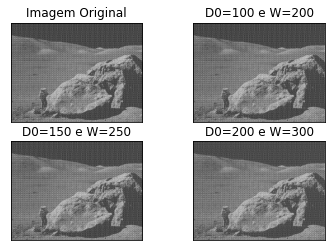

In [ ]:
#@title Filtro Butterworth Bandstop 
def butterworth_bandstop_filter(img,D0,W,n):
    assert img.ndim == 2
    def filtro(img,D0,W,n=4):
      r,c = img.shape[1],img.shape[0]
      u = np.arange(r)
      v = np.arange(c)
      u, v = np.meshgrid(u, v) 
      passabaixa = np.sqrt( (u-r/2)**2 + (v-c/2)**2 ) 
      filtro = (1/(1+((passabaixa*W)/(passabaixa**2-D0**2))**(2*n))) 
     #torna o filtro bandpass:
     #filtro = 1 - (1/(1+((passabaixa*W)/(passabaixa**2-D0**2))**(2*n))) 
      return filtro
    filtro = filtro(img,D0,W,n) 
    gray = np.float64(img) 
    gray_fft = np.fft.fft2(gray) 
    gray_fftshift = np.fft.fftshift(gray_fft) 
    #multi
    dst_filtered = filtro * gray_fftshift 
    dst_ifftshift = np.fft.ifftshift(dst_filtered) 
    dst_ifft = np.fft.ifft2(dst_ifftshift) 
    dst = np.abs(np.real(dst_ifft))
    dst = np.clip(dst,0,255)
    return np.uint8(dst)


img = cv2.imread('corrompida01.png',0)

new_image1=butterworth_bandstop_filter(img,D0=100,W=5,n=4)
new_image2=butterworth_bandstop_filter(img,D0=150,W=10,n=4)
new_image3=butterworth_bandstop_filter(img,D0=200,W=20,n=4)


title=['Imagem Original','D0=100 e W=200','D0=150 e W=250','D0=200 e W=300']
print("W = Largura de Banda")
print("Butterworth de ordem n = 4")
images=[img,new_image1,new_image2,new_image3]
for i in np.arange(4):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(title[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Filtro Butterworth Bandstop 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


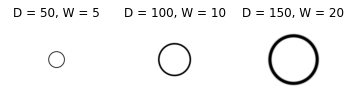

In [ ]:
#@title Espectro do Filtro 
def butterworth_bandstop_filter_espectrum(img,D0,W,n):
    assert img.ndim == 2
    def filtro(img,D0,W,n=4):
      r,c = img.shape[1],img.shape[0]
      u = np.arange(r)
      v = np.arange(c)
      u, v = np.meshgrid(u, v) 
      passabaixa = np.sqrt( (u-r/2)**2 + (v-c/2)**2 ) 
      filtro = (1/(1+((passabaixa*W)/(passabaixa**2-D0**2))**(2*n))) 
     #torna o filtro bandpass:
     #kernel = 1 - (1/(1+((passabaixa*W)/(passabaixa**2-D0**2))**(2*n))) 
      return filtro

    print("Filtro Butterworth Bandstop \n")
    d_1 = filtro(corrompida01,50,5,4)
    d_2 = filtro(corrompida01,100,10,4)
    d_3 = filtro(corrompida01,150,20,4)
    plt.subplot(131)
    plt.axis("off")
    plt.imshow(d_1,cmap="gray")
    plt.title('D = 50, W = 5')
    plt.subplot(132)
    plt.axis("off")
    plt.title('D = 100, W = 10')
    plt.imshow(d_2,cmap="gray")
    plt.subplot(133)
    plt.axis("off")
    plt.title("D = 150, W = 20")
    plt.imshow(d_3,cmap="gray")
    plt.show()

butterworth_bandstop_filter_espectrum(corrompida01,50,100,4)

------------------ Imagem original e seu respectivo espectro ------------------


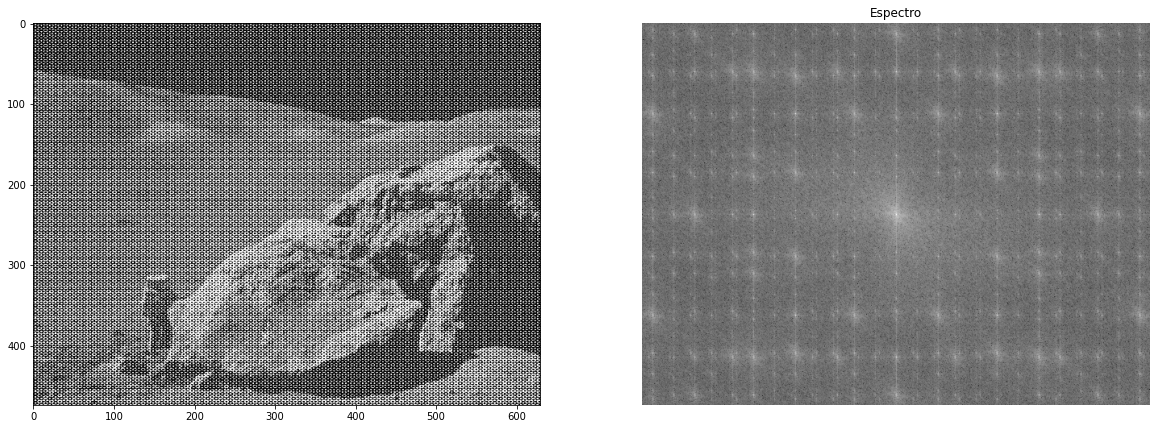

------------------ Imagem filtrada e seu respectivo espectro ------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


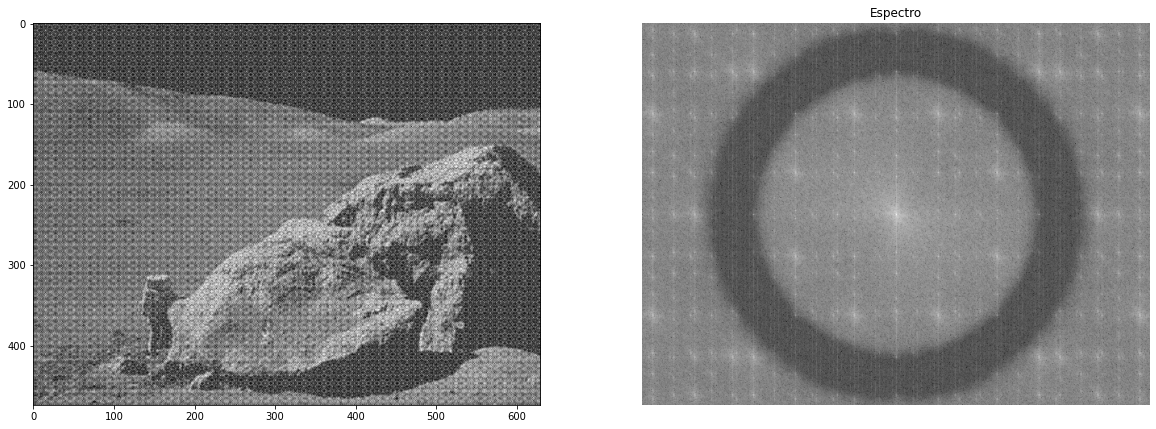

In [ ]:
#@title Imagens e Espectros
print('------------------ Imagem original e seu respectivo espectro ------------------')
img = cv2.imread('corrompida01.png', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
resultado = 20*np.log(np.abs(fshift))
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Espectro')
plt.axis('off')
plt.show()

print('------------------ Imagem filtrada e seu respectivo espectro ------------------')
img2  = butterworth_bandstop_filter(img,D0=200,W=80,n=4)
f = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
resultado = 20*np.log(np.abs(fshift))
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img2, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Espectro')
plt.axis('off')
plt.show()


**Recuperação da Imagem:** Infelizmente a imagem não permite ser recuperada da mesma forma demonstrada no livro, conforme discutido no forúm de dúvidas do Aprender. Tentou-se (como mostra abaixo) reduzir o ruído na imagem utilizando outros filtros, mas, ainda assim, o resultado não foi satisfatório. 

In [ ]:
#@title Filtragem Bandstop Ideal

def bandstop_filter(img,D0,W):
    assert img.ndim == 2
    def filtro(img,D0,W):


      r,c = img.shape[1],img.shape[0]
      u = np.arange(r)
      v = np.arange(c)
      u, v = np.meshgrid(u, v)
      passabaixas = np.sqrt( (u-r/2)**2 + (v-c/2)**2 )

      idx = (passabaixas < (D0 - W / 2)) | (passabaixas > (D0 + W / 2))
      passabaixas[idx] = 1
      passabaixas[~idx] = 0

      return passabaixas

    filtro = filtro(img,D0,W)
    gray = np.float64(img)
    gray_fft = np.fft.fft2(gray)
    gray_fftshift = np.fft.fftshift(gray_fft)
    dst = np.zeros_like(gray_fftshift)
    dst_filtered = filtro * gray_fftshift
    dst_ifftshift = np.fft.ifftshift(dst_filtered)
    dst_ifft = np.fft.ifft2(dst_ifftshift)
    dst = np.abs(np.real(dst_ifft))
    dst = np.clip(dst,0,255)
    return np.uint8(dst)




In [ ]:
#@title Imagens e Espectros
print('------------------ Imagem original e seu respectivo espectro ------------------')
img = cv2.imread('corrompida01.png', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
resultado = 20*np.log(np.abs(fshift))
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Espectro')
plt.axis('off')
plt.show()

print('------------------ Imagem filtrada e seu respectivo espectro ------------------')
img2  = bandstop_filter(img,D0=100,W=20)
f = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
resultado = 20*np.log(np.abs(fshift))
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img2, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Espectro')
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**1.2**
A imagem corrompida 02 é primeira imagem do planeta terra tirada do espaço (23 de agosto de 1966). Observe que a imagem está corrompida por um ruído periódico. Da mesma forma que no exemplo anterior, utilize a transformada de Fourier e um filtro de sua escolha para eliminar o ruído. Na sua solução mostre:

- a imagem original e o seu espectro;
- o filtro rejeita-faixa projetado e o seu espectro;
- a imagem restaurada e o seu espectro;
- o ruído e o seu espectro.  

In [ ]:
#@title Filtragem Bandstop Ideal

def bandstop_filter(img,D0,W):
    assert img.ndim == 2
    def filtro(img,D0,W):


      r,c = img.shape[1],img.shape[0]
      u = np.arange(r)
      v = np.arange(c)
      u, v = np.meshgrid(u, v)
      passabaixas = np.sqrt( (u-r/2)**2 + (v-c/2)**2 )

      idx = (passabaixas < (D0 - W / 2)) | (passabaixas > (D0 + W / 2))
      passabaixas[idx] = 1
      passabaixas[~idx] = 0

      return passabaixas

    filtro = filtro(img,D0,W)
    gray = np.float64(img)
    gray_fft = np.fft.fft2(gray)
    gray_fftshift = np.fft.fftshift(gray_fft)
    dst = np.zeros_like(gray_fftshift)
    dst_filtered = filtro * gray_fftshift
    dst_ifftshift = np.fft.ifftshift(dst_filtered)
    dst_ifft = np.fft.ifft2(dst_ifftshift)
    dst = np.abs(np.real(dst_ifft))
    dst = np.clip(dst,0,255)
    return np.uint8(dst)




Filtro Ideal Bandstop 



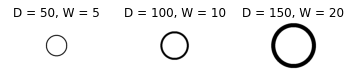

In [ ]:
#@title Espectro Bandstop Ideal

def espectro_bandstop_filter(img,D0,W):
    assert img.ndim == 2
    def filtro(img,D0,W):


      r,c = img.shape[1],img.shape[0]
      u = np.arange(r)
      v = np.arange(c)
      u, v = np.meshgrid(u, v)
      passabaixas = np.sqrt( (u-r/2)**2 + (v-c/2)**2 )

      idx = (passabaixas < (D0 - W / 2)) | (passabaixas > (D0 + W / 2))
      passabaixas[idx] = 1
      passabaixas[~idx] = 0

      return passabaixas

    print("Filtro Ideal Bandstop \n")
    d_1 = filtro(corrompida02,50,5)
    d_2 = filtro(corrompida02,65,10)
    d_3 = filtro(corrompida02,100,20)
    plt.subplot(131)
    plt.axis("off")
    plt.imshow(d_1,cmap="gray")
    plt.title('D = 50, W = 5')
    plt.subplot(132)
    plt.axis("off")
    plt.title('D = 100, W = 10')
    plt.imshow(d_2,cmap="gray")
    plt.subplot(133)
    plt.axis("off")
    plt.title("D = 150, W = 20")
    plt.imshow(d_3,cmap="gray")
    plt.show()


espectro_bandstop_filter(corrompida01,5,10)


------------------ Imagem original e seu respectivo espectro ------------------


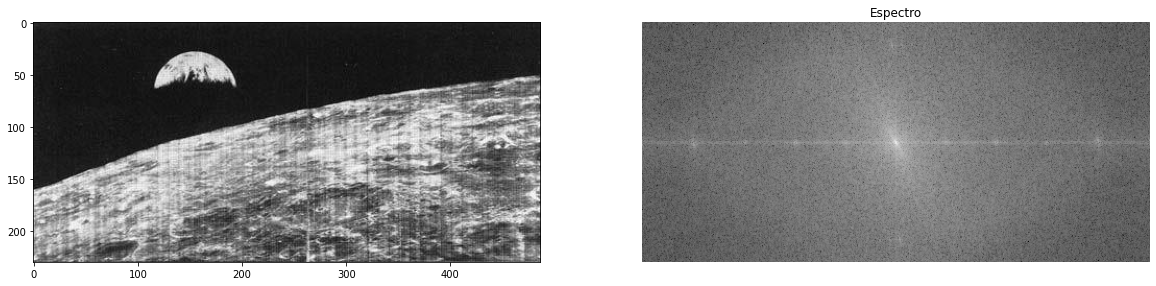

------------------ Imagem filtrada e seu respectivo espectro ------------------


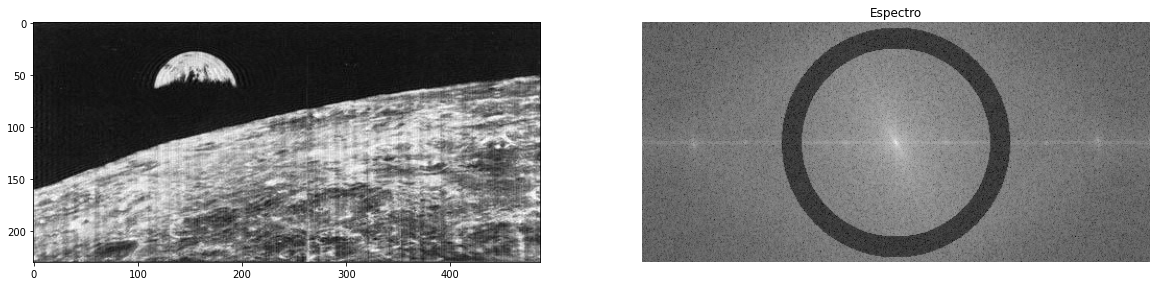

In [ ]:
#@title Imagens e Espectros
print('------------------ Imagem original e seu respectivo espectro ------------------')
img = cv2.imread('corrompida02.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
resultado = 20*np.log(np.abs(fshift))
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Espectro')
plt.axis('off')
plt.show()

print('------------------ Imagem filtrada e seu respectivo espectro ------------------')
img2  = bandstop_filter(img,D0=100,W=20)
f = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
resultado = 20*np.log(np.abs(fshift))
figsize=(20, 20)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(img2, cmap = 'gray')
plt.title('original')
plt.axis('off')
ax2.imshow(resultado, cmap = 'gray')
plt.title('Espectro')
plt.axis('off')
plt.show()


**Para essa imagem, o resultado foi satisfatório!**

**Conclusões**

Os filtro passa-bandas (ou rejeita-faixas) podem ser utilizados para extrair o ruído periódico. No entanto, filtro passa-banda não pode ser usado diretamente, se for usado diretamente, muitos detalhes da imagem serão perdidos.


## **Problema 2**

Nesta questão, utilize uma das imagens abaixo:
- [Barbara](https://homepages.cae.wisc.edu/~ece533/images/barbara.png)
- [Lena](https://homepages.cae.wisc.edu/~ece533/images/lena.png)
- [Zelda](https://homepages.cae.wisc.edu/~ece533/images/zelda.png)

**Obs**: Não se esqueça de transformar as respectivas imagens para escala de cinza dessas imagens, caso necessário for.

In [1]:
#@title Ler as imagens

#Lê as imagens (em grayscale)
barbara = cv2.imread('barbara.png',0)
lena = cv2.imread('lena.png',0)
zelda = cv2.imread('zelda.png',0)

NameError: ignored

**2.1**  Projete os seguintes filtros no domínio da frequência:
- passa-baixas ideal;
- passa-baixas Gaussiano;
- passa-baixas Butterworth.

Filtre (no domínio da frequência) as imagens Barbara, Lena e Zelda. Imprima as imagens para visualização.


**Passa-baixas ideal**

In [2]:
#@title Ideal Low-Pass Filter
def passabaixa(image, d, op):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    s1 = np.log(np.abs(fshift))

    def filtro(d):
        matriz = np.zeros(image.shape)
        pc = tuple(map(lambda x: (x - 1) / 2, s1.shape))
        for i in range(matriz.shape[0]):
            for j in range(matriz.shape[1]):
                def distancia(pa, pb):
                    distancia = sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
                    return distancia
                distancia = distancia(pc, (i, j))
                if distancia <= d:
                    matriz[i, j] = 1
                else:
                    matriz[i, j] = 0
        return matriz
    if op == 1:
      print("Filtro Ideal LowPass \n")
      d_1 = filtro(10)
      d_2 = filtro(30)
      d_3 = filtro(90)
      plt.subplot(131)
      plt.axis("off")
      plt.imshow(d_1,cmap="gray")
      plt.title('D =  10')
      plt.subplot(132)
      plt.axis("off")
      plt.title('D = 30')
      plt.imshow(d_2,cmap="gray")
      plt.subplot(133)
      plt.axis("off")
      plt.title("D =  90")
      plt.imshow(d_3,cmap="gray")
      plt.show()
    else:
      d_matriz = filtro(d)
      new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift * d_matriz)))
      return new_img

passabaixa(zelda,10,1)

NameError: ignored

In [ ]:
#@title Zelda
n = [10,30,90]

for num in n:
  img_ = passabaixa(zelda,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(zelda, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")
  

In [ ]:
#@title Bárbara
n = [10,30,90]

for num in n:
  img_ = passabaixa(barbara,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(barbara, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

In [ ]:
#@title Lena
n = [10,30,90]

for num in n:
  img_ = passabaixa(lena,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(lena, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

**Passa-Baixas Gaussiano**

In [ ]:
#@title Low Pass Gaussian Filter
def Gaussiano_passabaixas(image,d,op):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    s1 = np.log(np.abs(fshift))

    def filtro(d):
        transfor_matriz = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(transfor_matriz.shape[0]):
            for j in range(transfor_matriz.shape[1]):
                def distancia(pa,pb):
                    from math import sqrt
                    distancia = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return distancia
                distancia = distancia(center_point,(i,j))
                transfor_matriz[i,j] = np.exp(-(distancia**2)/(2*(d**2)))
        return transfor_matriz
    if op == 1:
      print("Filtro Gaussiano LowPass \n")
      d_1 = filtro(10)
      d_2 = filtro(30)
      d_3 = filtro(90)
      plt.subplot(131)
      plt.axis("off")
      plt.imshow(d_1,cmap="gray")
      plt.title('D =  10')
      plt.subplot(132)
      plt.axis("off")
      plt.title('D = 30')
      plt.imshow(d_2,cmap="gray")
      plt.subplot(133)
      plt.axis("off")
      plt.title("D =  90")
      plt.imshow(d_3,cmap="gray")
      plt.show()
    else:
      d_matriz = filtro(d)
      new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matriz)))
      return new_img
Gaussiano_passabaixas(zelda,1,1)

In [ ]:
#@title Zelda
n = [10,30,90]

for num in n:
  img_ = Gaussiano_passabaixas(zelda,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(zelda, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

In [ ]:
#@title Bárbara
n = [10,30,90]

for num in n:
  img_ = Gaussiano_passabaixas(barbara,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(barbara, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

In [ ]:
#@title Lena
n = [10,30,90]

for num in n:
  img_ = Gaussiano_passabaixas(lena,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(lena, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

**Passa-Baixas Butterworth**

In [ ]:
#@title Passa-Baixas Butterworth
def butterworth_low_pass(img,D0,butterworth_order,op):
    assert img.ndim == 2
    def filtro(img,cut_off,butterworth_order):
      r,c = img.shape[1],img.shape[0]
      u = np.arange(r)
      v = np.arange(c)
      u, v = np.meshgrid(u, v)
      passabaixas = np.sqrt( (u-r/2)**2 + (v-c/2)**2 )
      denom = 1.0 + (passabaixas / cut_off)**(2 * butterworth_order)
      passabaixas = 1.0 / denom
      return passabaixas

    kernel = filtro(img,D0,butterworth_order)
    if op == 1:
      print("Filtro Gaussiano LowPass \n")
      d_1 = filtro(img,10,4)
      d_2 = filtro(img,30,4)
      d_3 = filtro(img,90,4)
      plt.subplot(131)
      plt.axis("off")
      plt.imshow(d_1,cmap="gray")
      plt.title('D =  10')
      plt.subplot(132)
      plt.axis("off")
      plt.title('D = 30')
      plt.imshow(d_2,cmap="gray")
      plt.subplot(133)
      plt.axis("off")
      plt.title("D =  90")
      plt.imshow(d_3,cmap="gray")
      plt.show()
    else:
      gray = np.float64(img)
      gray_fft = np.fft.fft2(gray)
      gray_fftshift = np.fft.fftshift(gray_fft)
      dst = np.zeros_like(gray_fftshift)
      dst_filtered = kernel * gray_fftshift
      dst_ifftshift = np.fft.ifftshift(dst_filtered)
      dst_ifft = np.fft.ifft2(dst_ifftshift)
      dst = np.abs(np.real(dst_ifft))
      dst = np.clip(dst,0,255)
      return np.uint8(dst)

butterworth_low_pass(zelda,10,4,1)

In [ ]:
#@title Zelda
n = [5,20,90]

for num in n:
  img_ = butterworth_low_pass(zelda,num,4,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(zelda, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")
  plt.tight_layout()

In [ ]:
#@title Barbara

n = [5,20,90]

for num in n:
  img_ = butterworth_low_pass(barbara,num,4,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(barbara, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")
  plt.tight_layout()

In [ ]:
#@title Lena
n = [5,20,90]

for num in n:
  img_ = butterworth_low_pass(lena,num,4,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(lena, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")
  plt.tight_layout()

**2.2** Utilizando os filtros passa-baixas projetados na questão 2.1, obtenha os **filtros** **passa-alta** correspondentes e filtre (no domínio da frequência) as imagens Barbara, Lena e Zelda. Imprima as imagens para visualização.

**Passa-Altas Ideal**


In [ ]:
#@title Passa-altas Ideal
def passaaltas(image,d,op):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    s1 = np.log(np.abs(fshift))

    def filtro(d):
        matriz = np.zeros(image.shape)
        pc = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(matriz.shape[0]):
            for j in range(matriz.shape[1]):
                def distancia(pa,pb):
                    distancia = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return distancia
                distancia = distancia(pc,(i,j))
                if distancia <= d:
                    matriz[i,j]=0
                else:
                    matriz[i,j]=1
        return matriz
    if op == 1:
      print("Filtro Ideal HighPass \n")
      d_1 = filtro(10)
      d_2 = filtro(30)
      d_3 = filtro(90)
      plt.subplot(131)
      plt.axis("off")
      plt.imshow(d_1,cmap="gray")
      plt.title('D =  10')
      plt.subplot(132)
      plt.axis("off")
      plt.title('D = 30')
      plt.imshow(d_2,cmap="gray")
      plt.subplot(133)
      plt.axis("off")
      plt.title("D =  90")
      plt.imshow(d_3,cmap="gray")
      plt.show()
    else:
      d_matriz = filtro(d)
      new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matriz)))
      return new_img

passaaltas(zelda,10,1)

In [ ]:
#@title Zelda
n = [5,10,20,30,90]

for num in n:
  img_ = passaaltas(zelda,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(zelda, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")
  plt.tight_layout()

In [ ]:
#@title Bárbara
n = [5,10,20,30,90]

for num in n:
  img_ = passaaltas(barbara,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(barbara, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

In [ ]:
#@title Lena
n = [5,10,20,30,90]

for num in n:
  img_ = passaaltas(lena,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(lena, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")


**Passa-Altas Gaussiano**

In [ ]:
#@title Passa-Altas Gaussiano

def GaussianHigh(image,d,op):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    s1 = np.log(np.abs(fshift))

    def filtro(d):
        matriz = np.zeros(image.shape)
        pc = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(matriz.shape[0]):
            for j in range(matriz.shape[1]):
                def distancia(pa,pb):
                    distancia = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return distancia
                distancia = distancia(pc,(i,j))
                matriz[i,j] = 1-np.exp(-(distancia**2)/(2*(d**2)))
        return matriz
    if op == 1:
      print("Filtro Ideal HighPass \n")
      d_1 = filtro(10)
      d_2 = filtro(30)
      d_3 = filtro(90)
      plt.subplot(131)
      plt.axis("off")
      plt.imshow(d_1,cmap="gray")
      plt.title('D =  10')
      plt.subplot(132)
      plt.axis("off")
      plt.title('D = 30')
      plt.imshow(d_2,cmap="gray")
      plt.subplot(133)
      plt.axis("off")
      plt.title("D =  90")
      plt.imshow(d_3,cmap="gray")
      plt.show()
    else:
      d_matriz = filtro(d)
      new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matriz)))
      return new_img

GaussianHigh(zelda,5,1)

In [ ]:
#@title Zelda
n = [5,10,20,30,90]

for num in n:
  img_ = GaussianHigh(zelda,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(zelda, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

In [ ]:
#@title Bárbara
n = [5,10,20,30,90]

for num in n:
  img_ = GaussianHigh(barbara,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(barbara, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

In [ ]:
#@title Lena
n = [5,10,20,30,90]

for num in n:
  img_ = GaussianHigh(lena,num,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(lena, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

**Passa-Altas ButterWorth**

In [ ]:
#@title Passa-Altas Butterworth

def butterworth_high(img,D0,n,op):
    assert img.ndim == 2
    def filtro(img,cut_off,butterworth_order):
      r,c = img.shape[1],img.shape[0]
      u = np.arange(r)
      v = np.arange(c)
      u, v = np.meshgrid(u, v)
      passabaixas = np.sqrt( (u-r/2)**2 + (v-c/2)**2 )
      denom = 1.0 + (passabaixas / cut_off)**(2 * butterworth_order)
      passabaixas = 1.0 / denom
      return passabaixas
    #filtro passa alta = 1 - filtro passa baixa
    kernel = 1 - filtro(img,D0,n)
    if op == 1:
      print("Filtro Gaussiano HighPass \n")
      d_1 = 1 - filtro(img,10,4)
      d_2 = 1 - filtro(img,30,4)
      d_3 = 1 - filtro(img,90,4)
      plt.subplot(131)
      plt.axis("off")
      plt.imshow(d_1,cmap="gray")
      plt.title('D =  10')
      plt.subplot(132)
      plt.axis("off")
      plt.title('D = 30')
      plt.imshow(d_2,cmap="gray")
      plt.subplot(133)
      plt.axis("off")
      plt.title("D =  90")
      plt.imshow(d_3,cmap="gray")
      plt.show()
    else:
      gray = np.float64(img)
      gray_fft = np.fft.fft2(gray)
      gray_fftshift = np.fft.fftshift(gray_fft)
      dst = np.zeros_like(gray_fftshift)
      dst_filtered = kernel * gray_fftshift
      dst_ifftshift = np.fft.ifftshift(dst_filtered)
      dst_ifft = np.fft.ifft2(dst_ifftshift)
      dst = np.abs(np.real(dst_ifft))
      dst = np.clip(dst,0,255)
      return np.uint8(dst)

butterworth_high(zelda,10,4,1)

In [ ]:
#@title Zelda
n = [5,10,20,30,90]

for num in n:
  img_ = butterworth_high(zelda,num, 1,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(zelda, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

In [ ]:
#@title Bárbara
n = [5,10,20,30,90]

for num in n:
  img_ = butterworth_high(barbara,num, 1,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(barbara, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

In [ ]:
#@title Lena
n = [5,10,20,30,90]

for num in n:
  img_ = butterworth_high(lena,num, 1,0)
  figsize=(12, 12)
  fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
  ax1.imshow(lena, cmap="gray")
  plt.title('Original Image')
  ax1.axis('off')
  plt.axis('off')
  plt.title('d = {}'.format(num))
  plt.imshow(img_, cmap="gray")

**2.3** Utilize os filtros passa-baixas e passa-altas projetados para implementar a técnica de máscara de nitidez (unsharp masking) e a técnica high boost no domínio da frequência. 

Considerando as três imagens acima, teste o algoritmos para k = 1 (máscara de nitidez) e para pelo menos 5 valores de k > 1, comentando sobre os diversos resultados.


**Gaussiano**

In [ ]:
#@title Zelda
img_path = "zelda.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = Gaussiano_passabaixas(zelda,30,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(zelda, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Gaussiano Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = Gaussiano_passabaixas(img,30,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(zelda, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()

In [ ]:
#@title Barbara 
img_path = "barbara.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = Gaussiano_passabaixas(barbara,30,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(barbara, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Gaussiano Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = Gaussiano_passabaixas(img,30,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(barbara, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()


In [ ]:
#@title Lena
img_path = "lena.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = Gaussiano_passabaixas(lena,30,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(lena, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Gaussiano Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = Gaussiano_passabaixas(img,30,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(lena, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()

**LowPass Ideal**

In [ ]:
#@title Zelda 
img_path = "zelda.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = passabaixa(zelda,30,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(zelda, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = passabaixa(img,30,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(img, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()

In [ ]:
#@title Barbara
img_path = "barbara.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = passabaixa(barbara,30,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(barbara, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = passabaixa(img,30,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(barbara, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()


In [ ]:
#@title Lena
img_path = "lena.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = passabaixa(lena,30,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(lena, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = passabaixa(img,30,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(lena, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()


**Butterworth**

In [ ]:
#@title Zelda 
img_path = "zelda.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = butterworth_low_pass(zelda,30,4,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(zelda, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Butterworth Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = butterworth_low_pass(img,30,4,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(img, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()


In [ ]:
#@title Barbara 
img_path = "barbara.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = butterworth_low_pass(barbara,30,4,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(barbara, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Butterworth Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = butterworth_low_pass(img,30,4,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(img, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()


In [ ]:
#@title Lena 
img_path = "lena.png"
valores = [1,1.5,2,2.5,3,5,7]
img_blurred = butterworth_low_pass(lena,30,4,0)
figsize=(12, 12)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
ax1.imshow(lena, cmap="gray")
plt.title('Original Image')
ax1.axis('off')
plt.axis('off')
plt.title('Imagem Borrada Filtro Butterworth Low Pass (2.1)')
plt.imshow(img_blurred, cmap="gray")
plt.tight_layout()
for k in valores:
    img = cv2.imread(img_path, 0)
    try:
        img = cv2.cvtColor(img_path, cv2.COLOR_BGR2GRAY)
    except:
        pass
    img_blurred = butterworth_low_pass(img,30,4,0)
    img_blurred = np.uint8(img_blurred)
    img_ = cv2.addWeighted(img, 1.0 + k, img_blurred, -k, 0)
    figsize=(12, 12)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(img, cmap="gray")
    plt.title('Original Image')
    ax1.axis('off')
    plt.axis('off')
    plt.title('k = {}'.format(k))
    plt.imshow(img_, cmap="gray")
    plt.tight_layout()


Os resultados foram mais satisfatório para valores de k entre 1 e 3, usando o filtro passa baixa Gaussiano para borrar a imagem. 